In [111]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
from sklearn import metrics

import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression

In [112]:

train_data=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv")
train_data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [113]:
train_data.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [114]:
train_data.shape

(31647, 18)

In [115]:
train_data.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [116]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [117]:
# 10 categorical columns and 8 int column
#no null values

In [118]:
train_data['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

<AxesSubplot:>

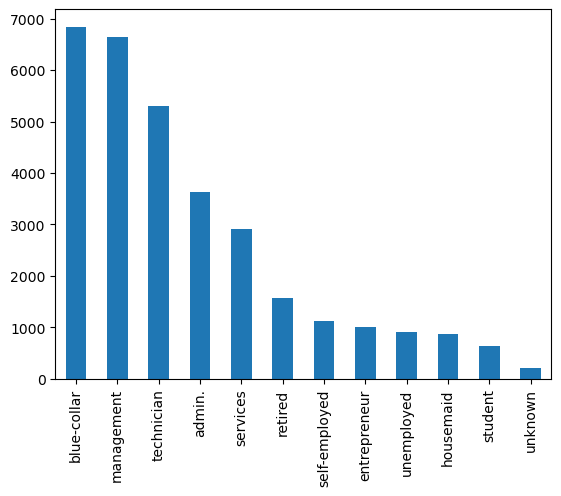

In [119]:
train_data['job'].value_counts().plot(kind='bar')

In [120]:
train_data['marital'].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

<AxesSubplot:>

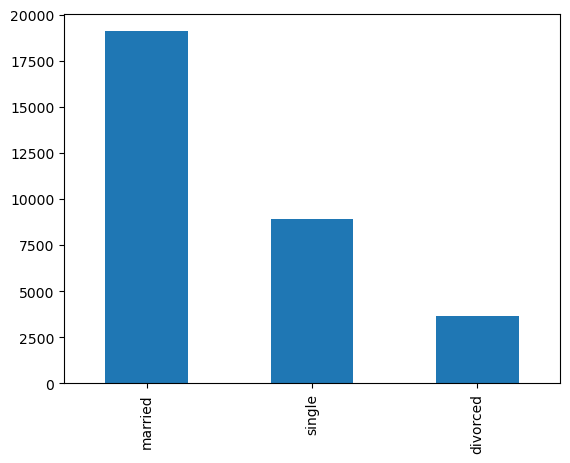

In [121]:
train_data['marital'].value_counts().plot(kind='bar')

In [122]:
#married are more divorced are less in number

In [123]:
train_data['education'].value_counts()

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

<AxesSubplot:>

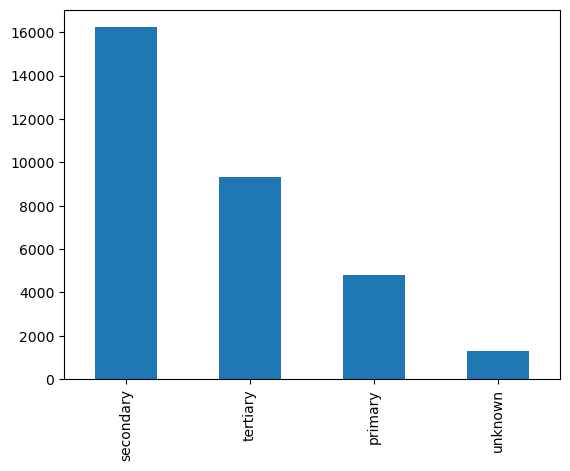

In [124]:
train_data['education'].value_counts().plot(kind='bar')

In [125]:
train_data['default'].value_counts()

no     31062
yes      585
Name: default, dtype: int64

<AxesSubplot:>

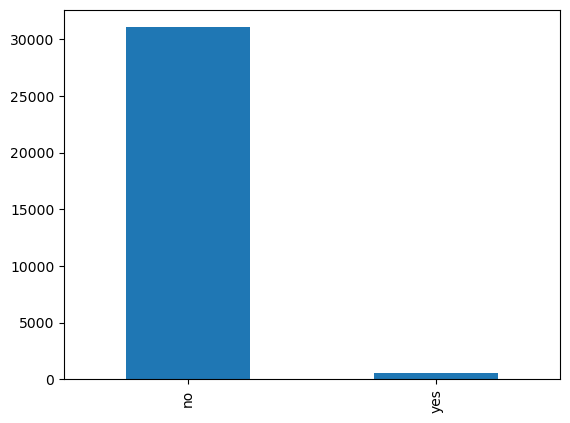

In [126]:
train_data['default'].value_counts().plot(kind='bar')

In [127]:
train_data['housing'].value_counts()

yes    17584
no     14063
Name: housing, dtype: int64

In [128]:
train_data['loan'].value_counts()

no     26516
yes     5131
Name: loan, dtype: int64

In [129]:
train_data['contact'].value_counts()

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64

In [130]:
train_data['month'].value_counts()

may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64

In [131]:
train_data['poutcome'].value_counts()

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64

In [132]:
train_data['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

<AxesSubplot:>

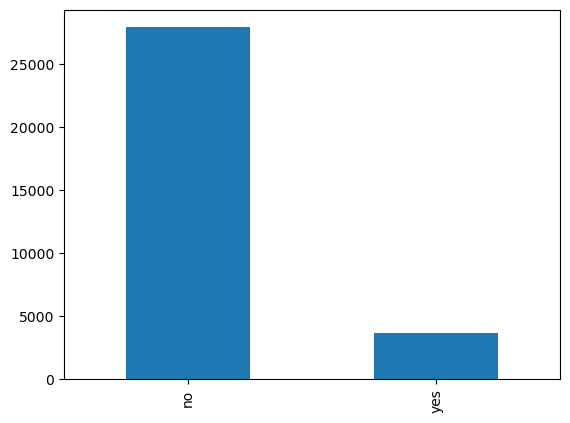

In [133]:
train_data['subscribed'].value_counts().plot(kind='bar')

In [134]:
train_data.corr()

,ID,age,balance,day,duration,campaign,pdays,previous
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000


<AxesSubplot:>

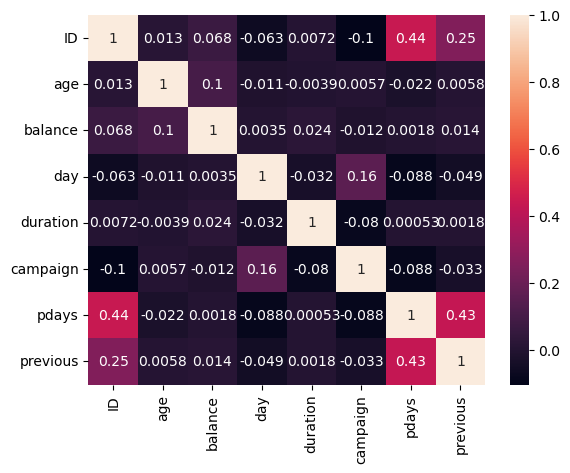

In [135]:
sns.heatmap(train_data.corr(),annot=True)

ValueError: could not convert string to float: 'no'

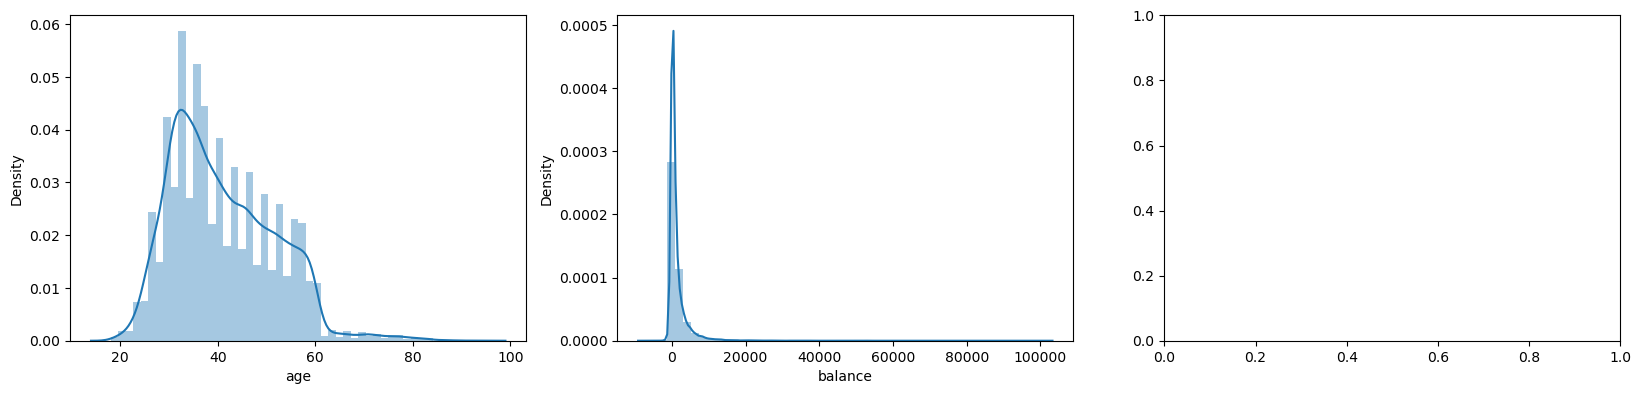

In [136]:
#plot a univariate distribution of continues observations
continuous_feature=['age','balance','housing','loan','day','duration','campaign','pdays','previous']
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for i in continuous_feature:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(train_data[i])
    plt.xlabel(i)
    plotnumber+=1
plt.show()


In [ ]:
#boxplot to show target distribution with respect numerical features
feature=['age','balance','day','duration','campaign','pdays','previous']
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in feature:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="subscribed", y= train_data[feature], data=train_data)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()


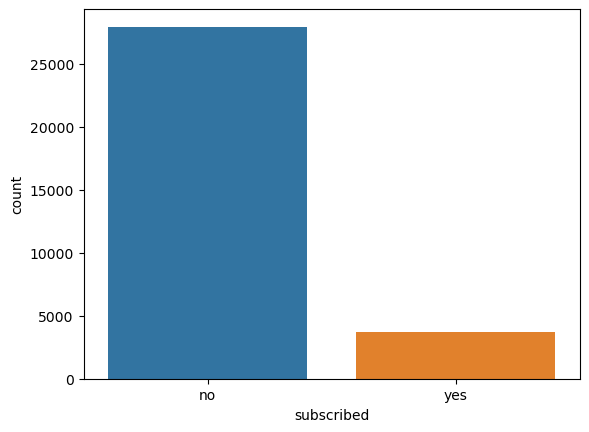

In [137]:
sns.countplot(x='subscribed',data=train_data)
plt.show()

In [138]:
train_data['subscribed'].groupby(train_data['subscribed']).count()

subscribed
no     27932
yes     3715
Name: subscribed, dtype: int64

In [139]:
df=train_data.copy()

In [140]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [141]:
df.groupby(['subscribed','default']).size()

subscribed  default
no          no         27388
            yes          544
yes         no          3674
            yes           41
dtype: int64

In [142]:
df.drop(['default'],axis=1,inplace=True)

In [143]:
df2.groupby(['deposit','pdays']).size()


NameError: name 'df2' is not defined

In [144]:
df.drop(['pdays'],axis=1,inplace=True)

In [145]:
df.groupby('age',sort=True)['age'].count()

age
18     8
19    22
20    39
21    48
22    86
      ..
90     1
92     1
93     1
94     1
95     1
Name: age, Length: 76, dtype: int64

In [146]:
df.groupby(['subscribed','balance'],sort=True)['balance'].count()

subscribed  balance
no          -8019      1
            -6847      1
            -4057      1
            -3372      1
            -2712      1
                      ..
yes          32685     1
             36252     1
             45248     1
             52587     2
             81204     1
Name: balance, Length: 7969, dtype: int64

In [147]:
df.groupby(['subscribed','duration'],sort=True)['duration'].count()

subscribed  duration
no          0            1
            2            3
            3            3
            4           11
            5           20
                        ..
yes         2775         1
            3076         1
            3102         1
            3183         1
            3881         1
Name: duration, Length: 2381, dtype: int64

In [148]:
df.groupby(['subscribed','campaign'],sort=True)['campaign'].count()

subscribed  campaign
no          1           10486
            2            7792
            3            3439
            4            2213
            5            1147
                        ...  
yes         16              2
            17              6
            20              1
            24              1
            32              1
Name: campaign, Length: 65, dtype: int64

In [149]:
df.groupby(['subscribed','balance'],sort=True)['balance'].count()

subscribed  balance
no          -8019      1
            -6847      1
            -4057      1
            -3372      1
            -2712      1
                      ..
yes          32685     1
             36252     1
             45248     1
             52587     2
             81204     1
Name: balance, Length: 7969, dtype: int64

In [150]:
df.groupby(['subscribed','previous'],sort=True)['previous'].count()

subscribed  previous
no          0           23553
            1            1499
            2            1154
            3             580
            4             382
            5             227
            6             128
            7             102
            8              56
            9              46
            10             33
            11             38
            12             25
            13             22
            14              9
            15             15
            16              8
            17              8
            18              5
            19              7
            20              5
            21              3
            22              3
            23              5
            24              2
            25              4
            26              1
            27              4
            28              1
            29              1
            32              1
            35              1
            37     

In [151]:
# all the above column have some outliers
from scipy.stats import zscore
out_features=train_data[['age','balance','duration','campaign','pdays','previous']]
z=np.abs(zscore(out_features))
z

,age,balance,duration,campaign,pdays,previous
0,1.415793,0.187933,0.832754,0.245906,0.408555,0.237059
1,0.937156,0.449397,0.649957,0.245906,0.408555,0.237059
2,1.313627,0.156159,0.070449,0.567059,0.408555,0.237059
3,1.509911,0.635055,2.368149,0.567059,0.447299,1.001336
4,0.937156,0.411091,0.474054,0.567059,0.408555,0.237059
...,...,...,...,...,...,...
31642,1.125392,0.450388,0.552724,0.245906,0.408555,0.237059
31643,1.133439,0.324903,0.699635,0.245906,0.408555,0.237059
31644,0.843038,0.347358,0.859979,0.075247,0.408555,0.237059
31645,1.509911,0.376088,0.918319,1.359859,2.994723,4.716521


In [152]:
#threshold=3
np.where(z>3)

(array([   21,    26,    36, ..., 31622, 31645, 31646]),
 array([3, 1, 4, ..., 4, 5, 2]))

In [153]:
#removing the data above zscore and creating the newdf
df1=train_data[(z<3).all(axis=1)]


df1.shape

(28124, 18)

In [154]:
print('old data shape',train_data.shape[0])
print("new data shape",df1.shape[0])

old data shape 31647
new data shape 28124


ValueError: could not convert string to float: 'no'

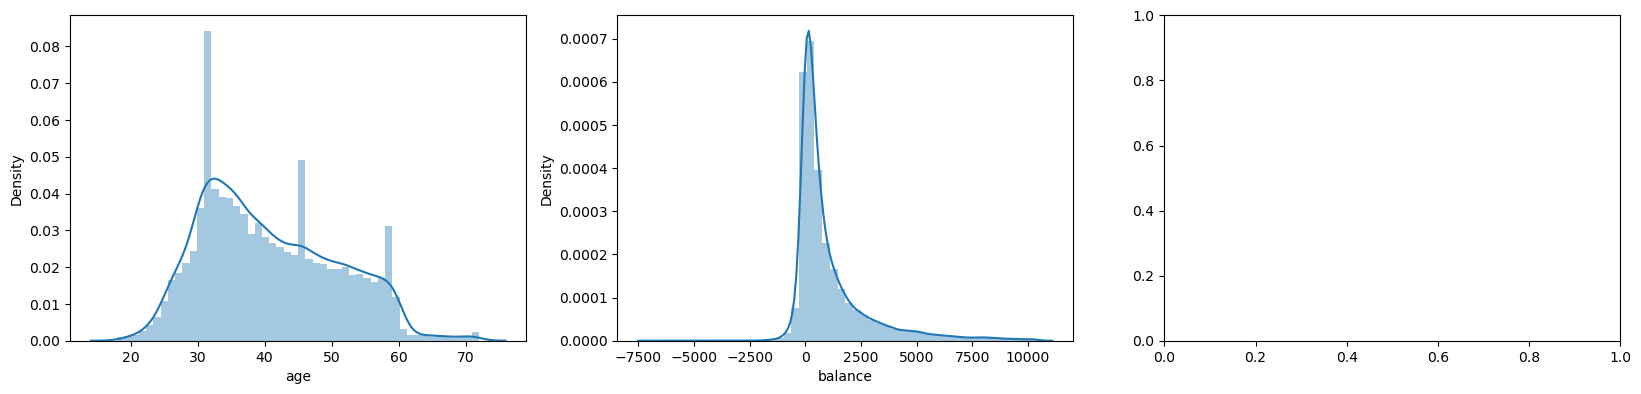

In [155]:
#plot a univariate distribution of continues observations
continuous_feature=['age','balance','housing','loan','day','duration','campaign','pdays','previous']
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for i in continuous_feature:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df1[i])
    plt.xlabel(i)
    plotnumber+=1
plt.show()


In [ ]:
#data in age and day column is distributed normally
#balance,duration,campaign,pdays and previous column data is skewed towards the right.

In [ ]:
df1.skew()

In [156]:
#converting categorical data to numerical
df1['subscribed']=[1 if x=='yes' else 0 for x in df1['subscribed']]
df1

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,1
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,12109,43,management,single,secondary,no,2968,no,no,unknown,20,jun,30,4,-1,0,unknown,0
31641,9476,37,technician,single,tertiary,no,1309,no,no,unknown,6,jun,442,2,-1,0,unknown,0
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,0
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,1


In [157]:
df1['subscribed'].value_counts()

0    25264
1     2860
Name: subscribed, dtype: int64

In [158]:
one_hot = pd.get_dummies(df1['job'])
df1 = df1.drop('job',axis = 1)
df1 = df1.join(one_hot)
df1= df1.drop('unknown',axis = 1)
df1.head()


,ID,age,marital,education,default,balance,housing,loan,contact,day,...,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,26110,56,married,unknown,no,1933,no,no,telephone,19,...,0,0,0,0,0,0,0,0,0,0
1,40576,31,married,secondary,no,3,no,no,cellular,20,...,0,0,0,0,0,0,0,0,0,0
2,15320,27,married,secondary,no,891,yes,no,cellular,18,...,0,0,0,0,0,0,1,0,0,0
3,43962,57,divorced,tertiary,no,3287,no,no,cellular,22,...,0,0,0,1,0,0,0,0,0,0
4,29842,31,married,secondary,no,119,yes,no,cellular,4,...,0,0,0,0,0,0,0,0,1,0


In [159]:
one_hot = pd.get_dummies(df1['marital'])
df1= df1.drop('marital',axis = 1)
df1= df1.join(one_hot)
df1= df1.drop('divorced',axis = 1)
df1.head()


,ID,age,education,default,balance,housing,loan,contact,day,month,...,housemaid,management,retired,self-employed,services,student,technician,unemployed,married,single
0,26110,56,unknown,no,1933,no,no,telephone,19,nov,...,0,0,0,0,0,0,0,0,1,0
1,40576,31,secondary,no,3,no,no,cellular,20,jul,...,0,0,0,0,0,0,0,0,1,0
2,15320,27,secondary,no,891,yes,no,cellular,18,jul,...,0,0,0,0,1,0,0,0,1,0
3,43962,57,tertiary,no,3287,no,no,cellular,22,jun,...,0,1,0,0,0,0,0,0,0,0
4,29842,31,secondary,no,119,yes,no,cellular,4,feb,...,0,0,0,0,0,0,1,0,1,0


In [160]:
one_hot = pd.get_dummies(df1['education'])
df1 = df1.drop('education',axis = 1)
df1 = df1.join(one_hot)
df1 = df1.drop('unknown',axis = 1)
df1.head()

,ID,age,default,balance,housing,loan,contact,day,month,duration,...,self-employed,services,student,technician,unemployed,married,single,primary,secondary,tertiary
0,26110,56,no,1933,no,no,telephone,19,nov,44,...,0,0,0,0,0,1,0,0,0,0
1,40576,31,no,3,no,no,cellular,20,jul,91,...,0,0,0,0,0,1,0,0,1,0
2,15320,27,no,891,yes,no,cellular,18,jul,240,...,0,1,0,0,0,1,0,0,1,0
3,43962,57,no,3287,no,no,cellular,22,jun,867,...,0,0,0,0,0,0,0,0,0,1
4,29842,31,no,119,yes,no,cellular,4,feb,380,...,0,0,0,1,0,1,0,0,1,0


In [161]:
df1['default']=[1 if x=='yes' else 0 for x in df1['default']]
df1

,ID,age,default,balance,housing,loan,contact,day,month,duration,...,self-employed,services,student,technician,unemployed,married,single,primary,secondary,tertiary
0,26110,56,0,1933,no,no,telephone,19,nov,44,...,0,0,0,0,0,1,0,0,0,0
1,40576,31,0,3,no,no,cellular,20,jul,91,...,0,0,0,0,0,1,0,0,1,0
2,15320,27,0,891,yes,no,cellular,18,jul,240,...,0,1,0,0,0,1,0,0,1,0
3,43962,57,0,3287,no,no,cellular,22,jun,867,...,0,0,0,0,0,0,0,0,0,1
4,29842,31,0,119,yes,no,cellular,4,feb,380,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,12109,43,0,2968,no,no,unknown,20,jun,30,...,0,0,0,0,0,0,1,0,1,0
31641,9476,37,0,1309,no,no,unknown,6,jun,442,...,0,0,0,1,0,0,1,0,0,1
31642,36483,29,0,0,yes,no,cellular,12,may,116,...,0,0,0,0,0,0,1,0,0,1
31643,40178,53,0,380,no,yes,cellular,5,jun,438,...,0,0,0,0,0,0,0,0,0,1


In [162]:
one_hot = pd.get_dummies(df1['contact'])
df1 = df1.drop('contact',axis = 1)
df1 = df1.join(one_hot)
df1= df1.drop('unknown',axis = 1)
df1.head()

,ID,age,default,balance,housing,loan,day,month,duration,campaign,...,student,technician,unemployed,married,single,primary,secondary,tertiary,cellular,telephone
0,26110,56,0,1933,no,no,19,nov,44,2,...,0,0,0,1,0,0,0,0,0,1
1,40576,31,0,3,no,no,20,jul,91,2,...,0,0,0,1,0,0,1,0,1,0
2,15320,27,0,891,yes,no,18,jul,240,1,...,0,0,0,1,0,0,1,0,1,0
3,43962,57,0,3287,no,no,22,jun,867,1,...,0,0,0,0,0,0,0,1,1,0
4,29842,31,0,119,yes,no,4,feb,380,1,...,0,1,0,1,0,0,1,0,1,0


In [163]:
one_hot = pd.get_dummies(df1['month'])
df1 =df1.drop('month',axis = 1)
df1= df1.join(one_hot)
df1= df1.drop('dec',axis = 1)
df1.head()

,ID,age,default,balance,housing,loan,day,duration,campaign,pdays,...,aug,feb,jan,jul,jun,mar,may,nov,oct,sep
0,26110,56,0,1933,no,no,19,44,2,-1,...,0,0,0,0,0,0,0,1,0,0
1,40576,31,0,3,no,no,20,91,2,-1,...,0,0,0,1,0,0,0,0,0,0
2,15320,27,0,891,yes,no,18,240,1,-1,...,0,0,0,1,0,0,0,0,0,0
3,43962,57,0,3287,no,no,22,867,1,84,...,0,0,0,0,1,0,0,0,0,0
4,29842,31,0,119,yes,no,4,380,1,-1,...,0,1,0,0,0,0,0,0,0,0


In [164]:
one_hot = pd.get_dummies(df1['poutcome'])
df1= df1.drop('poutcome',axis = 1)
df1= df1.join(one_hot)
df1= df1.drop('other',axis = 1)
df1.head()

,ID,age,default,balance,housing,loan,day,duration,campaign,pdays,...,jul,jun,mar,may,nov,oct,sep,failure,success,unknown
0,26110,56,0,1933,no,no,19,44,2,-1,...,0,0,0,0,1,0,0,0,0,1
1,40576,31,0,3,no,no,20,91,2,-1,...,1,0,0,0,0,0,0,0,0,1
2,15320,27,0,891,yes,no,18,240,1,-1,...,1,0,0,0,0,0,0,0,0,1
3,43962,57,0,3287,no,no,22,867,1,84,...,0,1,0,0,0,0,0,0,1,0
4,29842,31,0,119,yes,no,4,380,1,-1,...,0,0,0,0,0,0,0,0,0,1


In [165]:
df1['housing']=[1 if x=='yes' else 0 for x in df1['housing']]
df1

,ID,age,default,balance,housing,loan,day,duration,campaign,pdays,...,jul,jun,mar,may,nov,oct,sep,failure,success,unknown
0,26110,56,0,1933,0,no,19,44,2,-1,...,0,0,0,0,1,0,0,0,0,1
1,40576,31,0,3,0,no,20,91,2,-1,...,1,0,0,0,0,0,0,0,0,1
2,15320,27,0,891,1,no,18,240,1,-1,...,1,0,0,0,0,0,0,0,0,1
3,43962,57,0,3287,0,no,22,867,1,84,...,0,1,0,0,0,0,0,0,1,0
4,29842,31,0,119,1,no,4,380,1,-1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,12109,43,0,2968,0,no,20,30,4,-1,...,0,1,0,0,0,0,0,0,0,1
31641,9476,37,0,1309,0,no,6,442,2,-1,...,0,1,0,0,0,0,0,0,0,1
31642,36483,29,0,0,1,no,12,116,2,-1,...,0,0,0,1,0,0,0,0,0,1
31643,40178,53,0,380,0,yes,5,438,2,-1,...,0,1,0,0,0,0,0,0,0,1


In [166]:
df1['loan']=[1 if x=='yes' else 0 for x in df1['loan']]
df1

,ID,age,default,balance,housing,loan,day,duration,campaign,pdays,...,jul,jun,mar,may,nov,oct,sep,failure,success,unknown
0,26110,56,0,1933,0,0,19,44,2,-1,...,0,0,0,0,1,0,0,0,0,1
1,40576,31,0,3,0,0,20,91,2,-1,...,1,0,0,0,0,0,0,0,0,1
2,15320,27,0,891,1,0,18,240,1,-1,...,1,0,0,0,0,0,0,0,0,1
3,43962,57,0,3287,0,0,22,867,1,84,...,0,1,0,0,0,0,0,0,1,0
4,29842,31,0,119,1,0,4,380,1,-1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,12109,43,0,2968,0,0,20,30,4,-1,...,0,1,0,0,0,0,0,0,0,1
31641,9476,37,0,1309,0,0,6,442,2,-1,...,0,1,0,0,0,0,0,0,0,1
31642,36483,29,0,0,1,0,12,116,2,-1,...,0,0,0,1,0,0,0,0,0,1
31643,40178,53,0,380,0,1,5,438,2,-1,...,0,1,0,0,0,0,0,0,0,1


In [167]:
df1.dtypes

ID               int64
age              int64
default          int64
balance          int64
housing          int64
loan             int64
day              int64
duration         int64
campaign         int64
pdays            int64
previous         int64
subscribed       int64
admin.           uint8
blue-collar      uint8
entrepreneur     uint8
housemaid        uint8
management       uint8
retired          uint8
self-employed    uint8
services         uint8
student          uint8
technician       uint8
unemployed       uint8
married          uint8
single           uint8
primary          uint8
secondary        uint8
tertiary         uint8
cellular         uint8
telephone        uint8
apr              uint8
aug              uint8
feb              uint8
jan              uint8
jul              uint8
jun              uint8
mar              uint8
may              uint8
nov              uint8
oct              uint8
sep              uint8
failure          uint8
success          uint8
unknown    

In [168]:
x = df1.drop(['subscribed'],axis=1)
y = df1['subscribed']
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [169]:
df1['subscribed'].value_counts()

0    25264
1     2860
Name: subscribed, dtype: int64

In [170]:
#data is imbalanced

from imblearn.over_sampling import SMOTE

x_res,y_res=SMOTE().fit_resample(x,y)

y_res.value_counts()

0    25264
1    25264
Name: subscribed, dtype: int64

In [171]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=.20,random_state=42)

In [172]:
print(y.shape,y_train.shape,y_test.shape)

(28124,) (40422,) (10106,)


In [173]:
print(x.shape,x_train.shape,x_test.shape)

(28124, 43) (40422, 43) (10106, 43)


In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score

lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

print(accuracy_score(y_test,pred))


0.7960617454977241


In [175]:
print(confusion_matrix(y_test,pred))

[[3747 1286]
 [ 775 4298]]


In [176]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78      5033
           1       0.77      0.85      0.81      5073

    accuracy                           0.80     10106
   macro avg       0.80      0.80      0.80     10106
weighted avg       0.80      0.80      0.80     10106



In [177]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [185]:
dtc=DecisionTreeClassifier()
sv=SVC()
knn=KNeighborsClassifier()

RFC=RandomForestClassifier()
GBC=GradientBoostingClassifier()




model=[dtc,sv,knn,RFC,GBC]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    
    print('\n')

accuracy score of DecisionTreeClassifier() is:
0.9236097367900258
[[4586  447]
 [ 325 4748]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      5033
           1       0.91      0.94      0.92      5073

    accuracy                           0.92     10106
   macro avg       0.92      0.92      0.92     10106
weighted avg       0.92      0.92      0.92     10106



accuracy score of SVC() is:
0.8106075598654264
[[3998 1035]
 [ 879 4194]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      5033
           1       0.80      0.83      0.81      5073

    accuracy                           0.81     10106
   macro avg       0.81      0.81      0.81     10106
weighted avg       0.81      0.81      0.81     10106



accuracy score of KNeighborsClassifier() is:
0.9199485454185632
[[4313  720]
 [  89 4984]]
              precision    recall  f1-score   support

           0       0.98      

In [182]:
import joblib

#from sklearn.externals import joblib
#save the model as a object file

joblib.dump(dtc,'dtcfile.obj')
#load the model from file

MODEL=joblib.load('dtcfile.obj')

#use the loaded model to make predictions

MODEL.predict(x_test)

array([1, 0, 1, ..., 0, 1, 0])

In [183]:
conclusion=pd.DataFrame([MODEL.predict(x_test)[:],y_test[:]],index=['predicted','original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,10096,10097,10098,10099,10100,10101,10102,10103,10104,10105
predicted,1,0,1,0,1,0,1,1,0,1,...,1,0,0,1,0,1,0,0,1,0
original,1,0,1,1,1,0,1,1,0,1,...,1,0,0,1,0,1,0,0,1,0


In [184]:
result=MODEL.score(x_test,y_test)
print(result*100)

92.68751236888977
